This code is for seeking various soil, whose soil organic carbon (SOC) is diverse, in restricted location. <br/>

- Dataset <br/>
(1) 211024_BarePoints.csv : for making a cluster model according to SOC <br/>
(2) Sample_A.csv : (preliminary experiment data) for testing the cluster model <br/>

- Process <br/>
(1) Dimension-reduction : PCA <br/>
(2) K-means Clustering

### Upload Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
X_origin = pd.read_csv("./211024_BarePoints.csv")
X = X_origin.loc[:,'B03_Green_':'B04_Red_66']  # remove the first four columns 
X

,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66
0,2244,1652,3327,4459,3394,3355,3230,3124,2866
1,2292,1725,3459,4568,3618,3561,3465,3322,2938
2,1267,881,1992,2824,2241,2309,1983,1833,1752
3,2559,1914,3683,4856,3802,3770,3681,3560,3222
4,1881,1286,2879,3922,3097,2923,2876,2683,2573
...,...,...,...,...,...,...,...,...,...
1697,1338,852,2962,4020,2677,2647,2518,2363,2059
1698,2267,1592,3851,5107,3745,3711,3507,3380,3087
1699,1541,970,3050,4185,3071,3034,2825,2651,2341
1700,2151,1475,3647,4886,3530,3520,3406,3291,2952


### (Optional) Dimension Reduction: Try (1)PCA (2)k-sne

### 7-D PCA & 5-Means Clustering

(1) origin data : fit_transform() 7-D PCA <br/>
(2) origin data :  5-means clustering <br/>
(3) Upload new data <br/>
(4) new data : (only) transform() 7-D PCA <br/>
(5) new data : 5-means clustering <br/>
(6) concat(origin data, new data) <br/>
(7) concat data : k-sne <br/>

#### fitting model

In [5]:
# n-dimension PCA
pca = PCA(n_components=0.999)
X_pca = pca.fit_transform(X)
print(pca.n_components_)
pca.components_.T

7


array([[-0.27189013, -0.14798679,  0.49122225, -0.29546553, -0.00403193,
         0.15257205,  0.12152519],
       [-0.18898447, -0.06734522,  0.55244598, -0.44746972,  0.23660997,
         0.02056875, -0.05402078],
       [-0.29893117,  0.66407406,  0.36260916,  0.55508471,  0.17087063,
        -0.01515716,  0.02447029],
       [-0.40978168,  0.55422448, -0.40712084, -0.53795566, -0.24949538,
         0.08513942, -0.01546209],
       [-0.33995493, -0.13485332, -0.28440931, -0.04825248,  0.68091545,
        -0.46594249, -0.25589302],
       [-0.36428679, -0.22723853, -0.2081161 ,  0.14059997,  0.15691594,
         0.15942617,  0.64554451],
       [-0.36641155, -0.24477099, -0.12838214,  0.19212154, -0.00866298,
         0.46464787,  0.06468799],
       [-0.37062556, -0.24455949, -0.00526874,  0.21088099, -0.25220047,
         0.22307882, -0.68267291],
       [-0.3364295 , -0.18936855,  0.12474235,  0.10713318, -0.54827563,
        -0.67870415,  0.17041043]])

In [9]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
X_kmeans = kmeans.fit_transform(X_pca)
y_pred = kmeans.fit_predict(X_pca)
X_kmeans, y_pred

(array([[1753.30336774,  632.92108401, 3270.43302987, 5117.72872051,
          738.63187989],
        [2186.60543754, 1009.05735155, 3712.17784723, 5560.78227632,
          428.99997952],
        [1983.00967963, 3137.41877309,  793.16022227, 1630.36825089,
         4241.07879395],
        ...,
        [ 522.26706616,  805.29056016, 2019.3153541 , 3885.40469272,
         1897.05228037],
        [2174.27330434,  977.631253  , 3714.33843904, 5589.01925024,
          217.5640982 ],
        [1248.65608888, 2439.88287761,  502.7001697 , 2220.98360648,
         3556.16824364]]),
 array([1, 4, 2, ..., 0, 4, 2]))

#### Visualize clustering

Visualize by k-sne

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


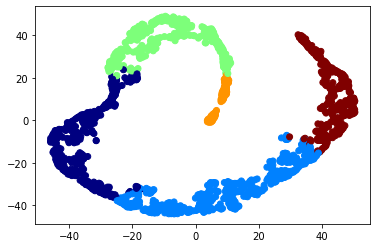

In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_kmeans)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred, cmap="jet")

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\uyoung\AppData\Local\Temp\ipykernel_33696\2018050355.py:5: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



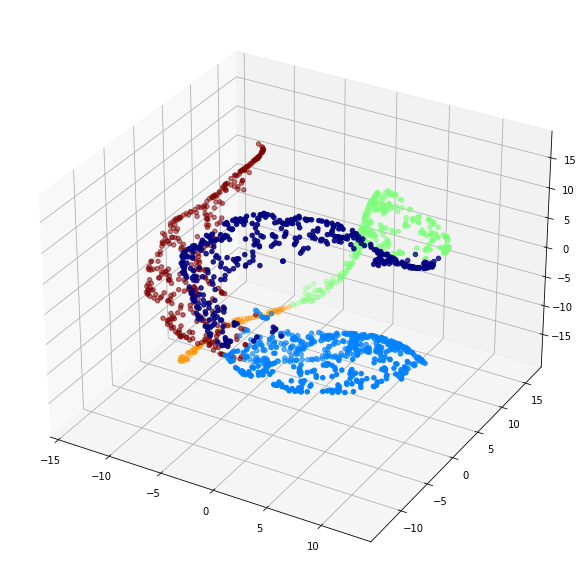

In [25]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_kmeans)

fig = plt.figure()
ax = fig.gca(projection='3d')

fig.set_size_inches(18.5,10.5)
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=y_pred, cmap="jet")

Visualize by plotly express

In [17]:
tsne_df = pd.DataFrame(X_tsne, columns=["tsne_1", "tsne_2", "tsne_3"])
tsne_df['centroid'] = y_pred
tsne_df

,tsne_1,tsne_2,tsne_3,centroid
0,-2.168669,-2.551801,-9.392598,1
1,-11.508348,-2.003315,-2.032393,4
2,-0.849438,11.494207,-3.761775,2
3,-9.542612,5.625940,8.492509,4
4,-1.130385,-9.509437,1.039444,0
...,...,...,...,...
1697,7.084923,-2.176897,12.381989,0
1698,-11.786309,3.791530,5.067000,4
1699,-4.134597,-9.307163,3.397287,0
1700,-13.691278,-1.811331,-1.990474,4


In [19]:
fig = px.scatter_3d(tsne_df,
                    x='tsne_1',
                    y='tsne_2',
                    z='tsne_3',
                    # size= np.ones(shape=(len(df),))*2,
                    color='centroid',
                    opacity=0.7,
                    width=1000,
                    height=800
                    
)
fig.update_layout(margin=dict(l=0, r=0,b=0,t=0))
fig.update_traces(marker_size=3)
fig.show()

CENTROID NUMBER : COLOR <br/>
0 : dark-blue <br/>
1 : purple <br/>
2 : pink <br/>
3 : orange <br/>
4 : yellow <br/>

#### upload test data

In [63]:
New = pd.read_csv("./211024_sample_A.csv")

test_X = New.loc[:,'B03_Green_':'B04_Red_66']  # new data
test_y = New.loc[:,'SOC %']    # y_label
New

,id,xcoord,ycoord,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66,SOC %,centroid
0,1,365430.3669,4113029.805,1579,1066,3531,4336,3154,2892,3080,2617,2128,0.71,NaN
1,2,365491.2564,4113087.712,2017,1370,3735,4971,3240,3634,3326,3465,2868,0.86,NaN
2,3,365587.7090,4113152.199,1962,1308,3649,4834,3329,3256,3166,3034,2748,0.87,NaN
3,4,365288.7694,4113029.785,1808,1175,3622,4861,3562,3420,3172,3025,2606,1.00,NaN
4,5,365834.5866,4111509.882,1892,1344,3653,5054,3300,3165,3041,2842,2541,1.07,NaN
5,6,366891.8773,4112647.814,1919,1254,3546,4703,3205,3260,3045,2813,2631,0.47,NaN
6,7,366851.6467,4112671.948,2138,1367,3967,5249,3640,3686,3481,3306,2944,0.52,NaN


(1) PCA

In [21]:
test_X_pca = pca.transform(test_X)  # Apply dimensionality reduction to the new data
# pca.components_.T, np.sqrt(pca.explained_variance_)

In [22]:
test_X_pca

array([[-3.81323220e+02,  4.08880196e+02, -1.06042831e+02,
         2.83624004e+02,  1.96045257e+02,  1.93949950e+02,
        -6.01569478e+01],
       [-1.83197817e+03,  2.23051485e+02, -3.01152718e+01,
         1.95357746e+02, -3.04093963e+02,  1.97457185e+02,
        -8.08014980e+00],
       [-1.35727758e+03,  3.43513980e+02, -5.59463607e+00,
         7.33877166e+01, -1.21891225e+02, -1.33482309e+01,
        -1.47584984e+01],
       [-1.38330691e+03,  3.31229723e+02, -2.94335588e+02,
         1.44748246e+02,  1.00371165e+02, -2.21345039e+01,
         1.21334016e+00],
       [-1.20678516e+03,  6.17374847e+02, -8.97841536e+01,
        -1.36244698e+02, -3.83240108e+01,  3.39664370e+01,
         7.87479956e+00],
       [-1.04460627e+03,  3.34144932e+02, -4.02712401e+00,
         4.77142844e+01, -8.22836477e+01,  1.68852909e+00,
         1.39856492e+02],
       [-2.22593911e+03,  4.34282425e+02, -1.35555832e+02,
         1.32577895e+02, -5.73954137e+01,  4.28915329e+01,
         7.0899037

(2) k-means clustering

In [23]:
test_X_kmeans = kmeans.transform(test_X_pca)
test_y_pred = kmeans.predict(test_X_pca)

(3) Visualize

TSNE

In [26]:
# combine the new data with the original data
X_ALL_kmeans = np.concatenate((X_kmeans, test_X_kmeans), axis=0)
y_ALL = np.concatenate((y_pred, test_y_pred), axis=0)

In [36]:
test_y_pred

array([1, 4, 1, 1, 1, 1, 4])

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



-7


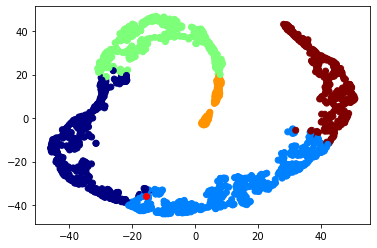

-6


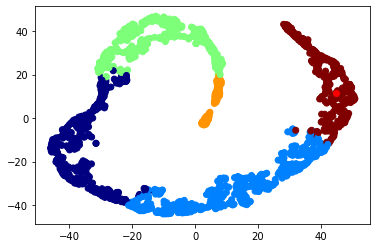

-5


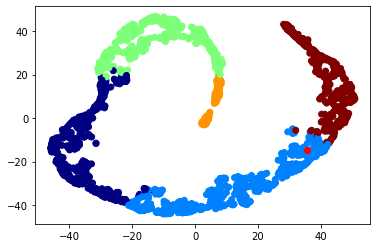

-4


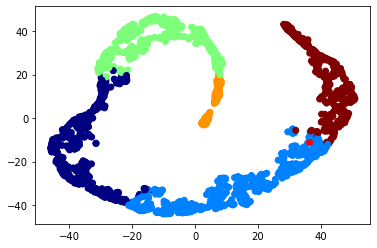

-3


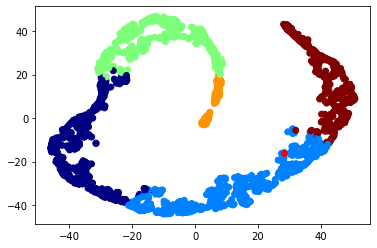

-2


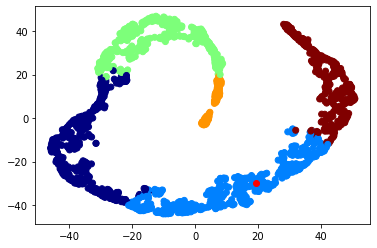

-1


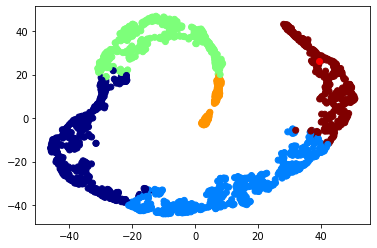

In [38]:
tsne = TSNE(n_components=2, random_state=42)
X_ALL_tsne = tsne.fit_transform(X_ALL_kmeans)

for i in range(-7, 0, 1):
    print(i)
    plt.scatter(X_ALL_tsne[:,0], X_ALL_tsne[:,1], c=y_ALL, cmap="jet")
    plt.scatter(X_ALL_tsne[i,0], X_ALL_tsne[i,1], c='red', cmap="jet")
    plt.show()

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Program\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



-7


C:\Users\uyoung\AppData\Local\Temp\ipykernel_33696\321468638.py:8: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



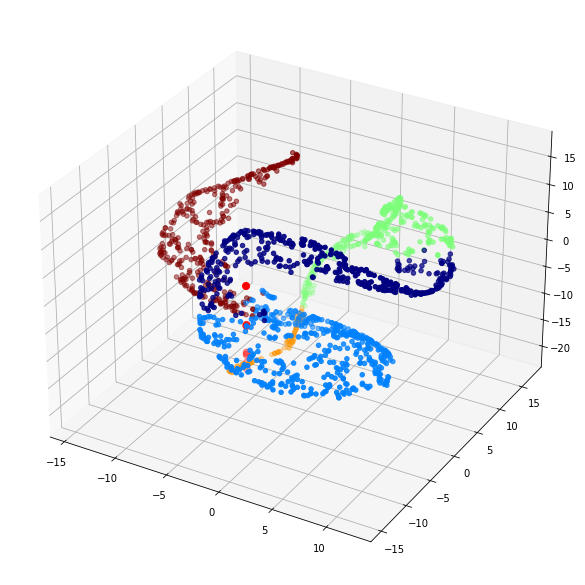

-6


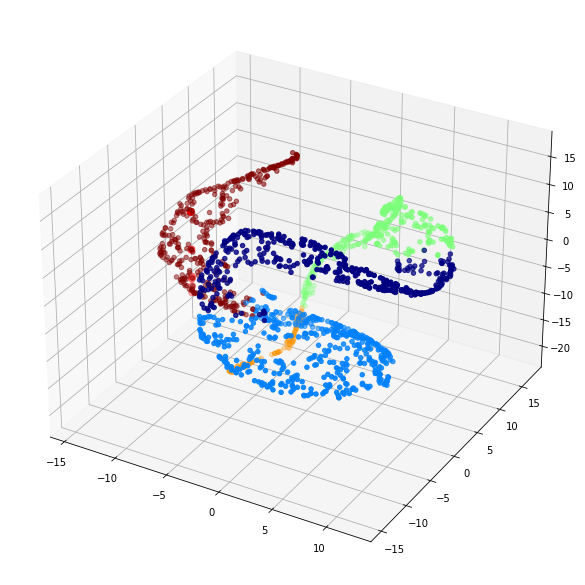

-5


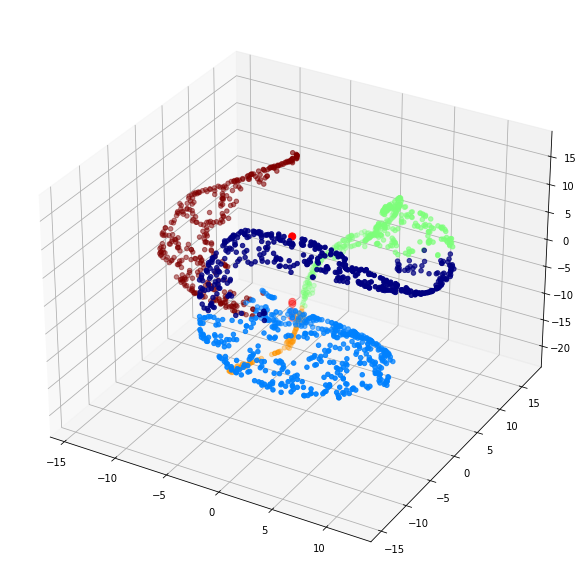

-4


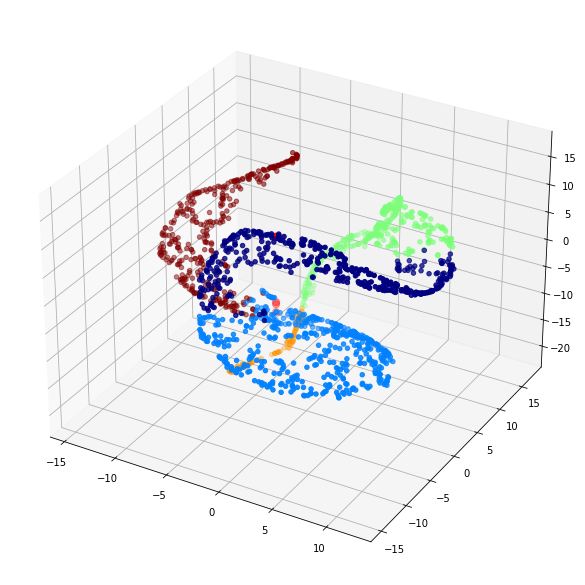

-3


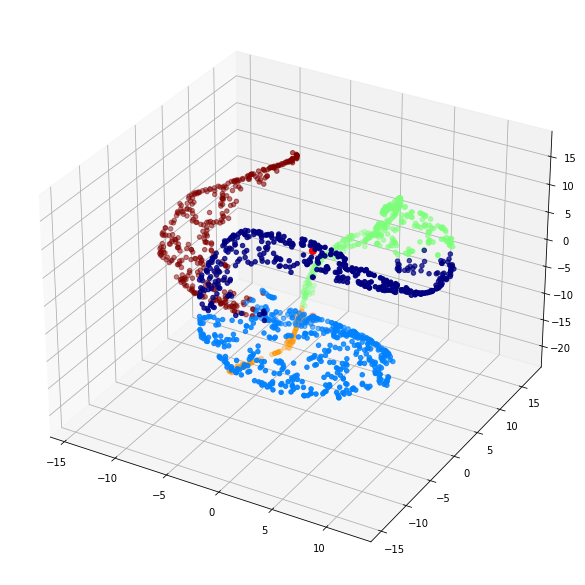

-2


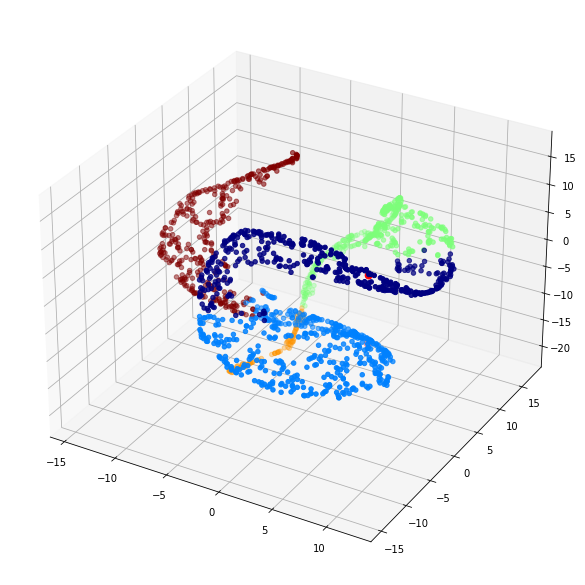

-1


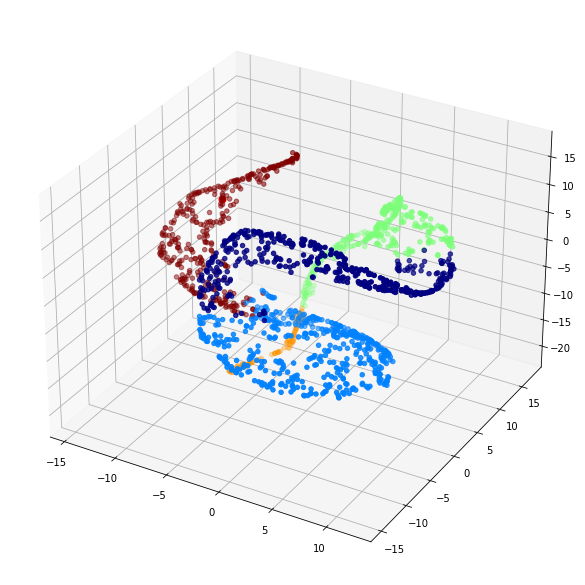

In [43]:
tsne = TSNE(n_components=3, random_state=42)
X_ALL_tsne = tsne.fit_transform(X_ALL_kmeans)

for i in range(-7, 0, 1):
    print(i)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    fig.set_size_inches(18.5,10.5)
    ax.scatter(X_ALL_tsne[:,0], X_ALL_tsne[:,1], X_ALL_tsne[:,2], c=y_ALL, cmap="jet")
    ax.scatter(X_ALL_tsne[i,0], X_ALL_tsne[i,1], X_ALL_tsne[i:,2], c='red', s=50, cmap="jet")
    plt.show()

#### update new data (add a centroid column)

update train data

In [70]:
X_origin['centroid'] = y_pred
X_origin

,id,xcoord,ycoord,BSI_211024,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66,centroid
0,3265124,364947.472,4107852.587,0.18422,2244,1652,3327,4459,3394,3355,3230,3124,2866,1
1,3265123,364927.472,4107852.587,0.16834,2292,1725,3459,4568,3618,3561,3465,3322,2938,4
2,3559098,372347.472,4105272.587,0.18888,1267,881,1992,2824,2241,2309,1983,1833,1752,2
3,3265120,364867.472,4107852.587,0.17123,2559,1914,3683,4856,3802,3770,3681,3560,3222,4
4,3559097,372327.472,4105272.587,0.19415,1881,1286,2879,3922,3097,2923,2876,2683,2573,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,3460951,366767.472,4106132.587,0.26540,1338,852,2962,4020,2677,2647,2518,2363,2059,0
1698,2445998,369627.472,4115052.587,0.21114,2267,1592,3851,5107,3745,3711,3507,3380,3087,4
1699,4756878,338907.472,4094732.587,0.23517,1541,970,3050,4185,3071,3034,2825,2651,2341,0
1700,2445997,369607.472,4115052.587,0.22059,2151,1475,3647,4886,3530,3520,3406,3291,2952,4


In [71]:
X_origin.to_csv("./211024_BarePoints.csv")

update test data

In [66]:
New['centroid'] = test_y_pred
New

,id,xcoord,ycoord,B03_Green_,B02_Blue_4,B12_SWIR_2,B11_SWIR_1,B8A_VRE_86,B07_VRE_78,B06_VRE_74,B05_VRE_75,B04_Red_66,SOC %,centroid
0,1,365430.3669,4113029.805,1579,1066,3531,4336,3154,2892,3080,2617,2128,0.71,1
1,2,365491.2564,4113087.712,2017,1370,3735,4971,3240,3634,3326,3465,2868,0.86,4
2,3,365587.7090,4113152.199,1962,1308,3649,4834,3329,3256,3166,3034,2748,0.87,1
3,4,365288.7694,4113029.785,1808,1175,3622,4861,3562,3420,3172,3025,2606,1.00,1
4,5,365834.5866,4111509.882,1892,1344,3653,5054,3300,3165,3041,2842,2541,1.07,1
5,6,366891.8773,4112647.814,1919,1254,3546,4703,3205,3260,3045,2813,2631,0.47,1
6,7,366851.6467,4112671.948,2138,1367,3967,5249,3640,3686,3481,3306,2944,0.52,4


In [67]:
New.to_csv("./211024_sample_A.csv") #update the label to the new data